# <p style="font-family:Bradley Hand ITC ; font-size:2em;color:BLACK;"> Titanic Surviver Prediction</p> 
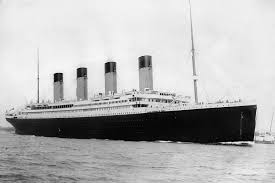

---

#### <p style="font-family:Bahnschrift SemiLight ; font-size:1em;color:BLACK;">IMPORTING LIBRARY</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<p style="font-family:Bahnschrift SemiLight ; font-size:2em;color:RED;">NOTE: </p>
<p style="font-family:Bahnschrift SemiLight ; font-size:1em;color:BLACK;">In Suriveved Column 0 means Not survived and 1 means Survived  </p>


### <p style="font-family:Bahnschrift SemiLight ; font-size:1em;color:BLACK;">Exploratory Data Analysis</p>


##### To See Profiling Report Click on Profile_report.html. It has Done All the EDA

In [84]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data, title='Pandas Profiling Report', explorative=True)
profile.to_file('profile_report.html')

##### Visulize Class Imbalance

Imbalanced classes are a common problem in machine learning classification where there are a disproportionate ratio of observations in each class.

In [86]:
from yellowbrick.target import ClassBalance
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (4,4)

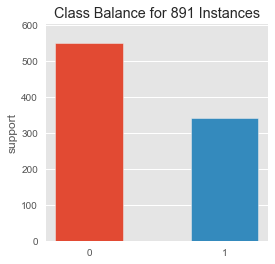

In [87]:
visulizer=ClassBalance(labels=["0","1"]).fit(data.Survived)
visulizer.show()

There is a class Imbalance in the dataset so we have to take care that we train and test our model with equal percentage of class imbalance

In [4]:
col_to_drop=['PassengerId','Name','Ticket', 'Cabin', 'Embarked']

In [5]:
data_clean=data.drop(col_to_drop,axis=1)

In [6]:
data_clean

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_clean['Sex']=le.fit_transform(data_clean['Sex'])

In [8]:
data_clean.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833


In [9]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


In [10]:
data_clean.fillna(data_clean['Age'].mean(),inplace=True)

In [11]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


In [12]:
X=data_clean[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y=data_clean['Survived']

In [13]:
print(X.shape,y.shape)

(891, 6) (891,)


## IMPLEMENTING DECISION TREE

- Here, we have implemented a basic Decision Tree. A basic Algorithm contains 3 parameter dataset,Attribute List,Attribute Selection method so here we are implementing one of the Attribute selection method called `Information Gain`.
- Attribute selection method helps to `best` discriminates the given tuple according to the classes. 
- if tuples in Data set are all in same class then Node N become Leaf Node and labeled with that class
- Other wise algorithm calls attribute selection to test at that node

In [14]:
def entropy(col):
    counts=np.unique(col,return_counts=True)
    N=float(col.shape[0])
    ent=0.0
    
    for ix in counts[1]:
        p=ix/N
        ent +=(-1.0*p*np.log2(p))
    return ent
        
        

In [15]:
def divide_data(x_data,fkey,fval):
    x_right=pd.DataFrame([],columns=x_data.columns)
    x_left=pd.DataFrame([],columns=x_data.columns)
    for ix in range(x_data.shape[0]):
        val=x_data[fkey].iloc[ix]
        if val>fval:
            x_right=x_right.append(x_data.iloc[ix])
        else:
            x_left=x_left.append(x_data.iloc[ix])
    return x_left,x_right
            

In [16]:
def infomation_gain(x_data,fkey,fval):
    left,right=divide_data(x_data,fkey,fval)
    # % of total samples are on left and right
    l=float(left.shape[0])/x_data.shape[0]
    r=float(right.shape[0])/x_data.shape[0]
    
    # All example come to one side
    if left.shape[0]==0 or right.shape[0]==0:
        return -1000000
    
    i_gain=entropy(x_data.Survived)-(l*entropy(left.Survived)+r*entropy(right.Survived))
    return i_gain
    
    
    
    

In [17]:
class DecisionTree:
    
    #constructor
    def __init__(self,depth=0,max_depth=5):
        self.left=None
        self.right=None
        self.fkey=None
        self.fval=None
        self.max_depth=max_depth
        self.depth=depth
        self.target=None
    
    
    def train(self,X_train):
        features=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
        info_gains=[]
        for fx in features:
            i_gain=infomation_gain(X_train,fx,X_train[fx].mean())
            info_gains.append(i_gain)
        
        self.fkey=features[np.argmax(info_gains)]
        
        self.fval=X_train[self.fkey].mean()
        print("Making Tree Features is ",self.fkey)
        #split Data
        data_left,data_right=divide_data(X_train,self.fkey,self.fval)
        data_left=data_left.reset_index(drop=True)
        data_right=data_right.reset_index(drop=True)
        
        # Stopping Critiria:
        # 1. it is truly a leaf node
        if data_left.shape[0]==0 or data_right.shape[0]==0:
            if X_train.Survived.mean()>=0.5:
                self.target=1
            else:
                self.target=0
            return 
        
        # Stop early when depth >= max_Depth
        if(self.depth>=self.max_depth):
            if X_train.Survived.mean()>=0.5:
                self.target=1
            else:
                self.target=0
            return 
        #Recursive Case when one of the base case is not hitting
        self.left=DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.left.train(data_left)
        
        self.right=DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.right.train(data_right)
        
        #  You can set a target at every node
        if(self.depth>=self.max_depth):
            if X_train.Survived.mean()>=0.5:
                self.target=1
            else:
                self.target=0
            return  
    def predict(self,test):
        if test[self.fkey]>self.fval:
            
            if self.right is None:
                return self.target
            return self.right.predict(test)
        else:
            if self.left is None:
                return self.target
            return self.left.predict(test)
            
        
    

### Train -test split

In [18]:
split=int(0.8*data_clean.shape[0])
train_data=data_clean[:split]
test_data=data_clean[split:]
test_data=test_data.reset_index(drop=True)

In [19]:
print(train_data.shape,test_data.shape)

(712, 7) (179, 7)


In [20]:
dt=DecisionTree()
dt.train(train_data)


Making Tree Features is  Sex
Making Tree Features is  Pclass
Making Tree Features is  Age
Making Tree Features is  SibSp
Making Tree Features is  Pclass
Making Tree Features is  Age
Making Tree Features is  Age
Making Tree Features is  SibSp
Making Tree Features is  Parch
Making Tree Features is  Pclass
Making Tree Features is  SibSp
Making Tree Features is  Fare
Making Tree Features is  Parch
Making Tree Features is  Age
Making Tree Features is  Pclass
Making Tree Features is  Age
Making Tree Features is  Age
Making Tree Features is  Parch
Making Tree Features is  SibSp
Making Tree Features is  Fare
Making Tree Features is  Age
Making Tree Features is  Age
Making Tree Features is  Fare
Making Tree Features is  Age
Making Tree Features is  Age
Making Tree Features is  Fare
Making Tree Features is  Age
Making Tree Features is  Age
Making Tree Features is  Fare
Making Tree Features is  Fare
Making Tree Features is  Fare
Making Tree Features is  Age
Making Tree Features is  Fare
Making Tr

In [22]:
y_pred=[]
for ix in range(test_data.shape[0]):
    y_pred.append(dt.predict(test_data.iloc[ix]))

In [26]:
y_pred=np.array(y_pred).reshape((-1,1))
print(y_pred.shape)

(179, 1)


In [29]:
y_actual=np.array(test_data['Survived']).reshape((-1,1))
y_actual.shape

(179, 1)

In [35]:
acc=(np.sum(y_pred==y_actual)/y_pred.shape[0])*100

In [36]:
acc

87.15083798882681

#####  WE ARE GETTING A GOOD ACCURACY ON TEST SET 

## THANK YOU!